## Job Recommender System

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

### Importing Dataset

In [5]:
data = pd.read_csv("dataset/jobs.csv")
data.head()

,Unnamed: 0,Job Salary,Job Experience Required,Key Skills,Role Category,Functional Area,Industry,Job Title
0,0,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,1,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,2,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,3,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,4,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


### Data Preprocessing

In [6]:
data = data.drop("Unnamed: 0",axis=1)

In [7]:
data.isnull().sum()

Job Salary                 0
Job Experience Required    0
Key Skills                 0
Role Category              0
Functional Area            0
Industry                   0
Job Title                  0
dtype: int64

### Visualization of Text Data using WordCloud Library

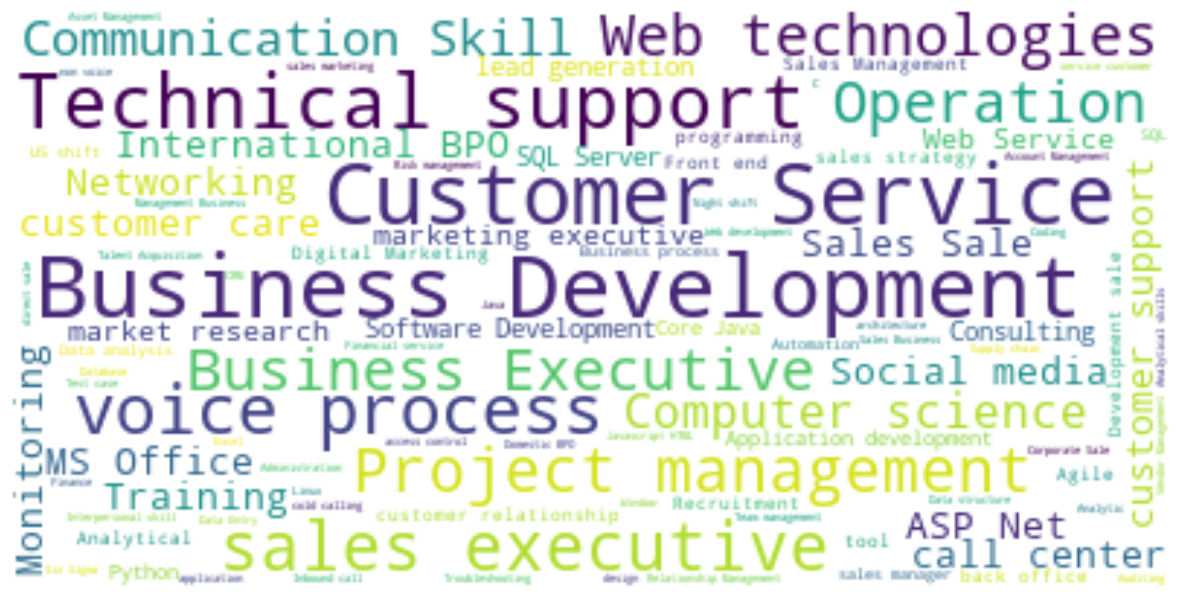

In [8]:
text = " ".join(i for i in data["Key Skills"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

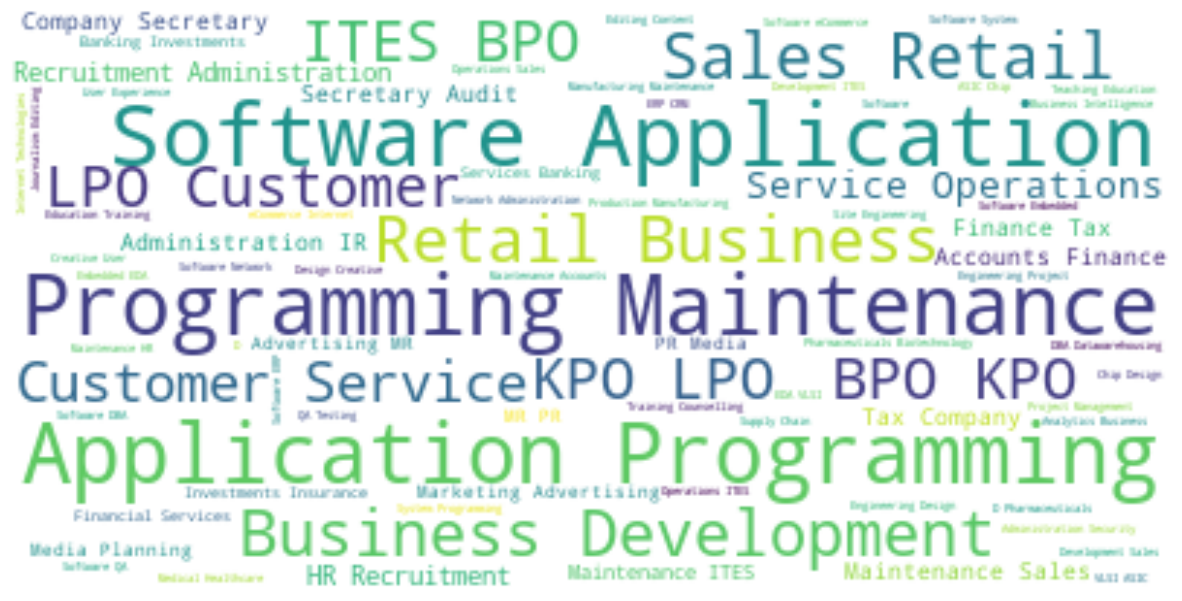

In [9]:
text = " ".join(i for i in data["Functional Area"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

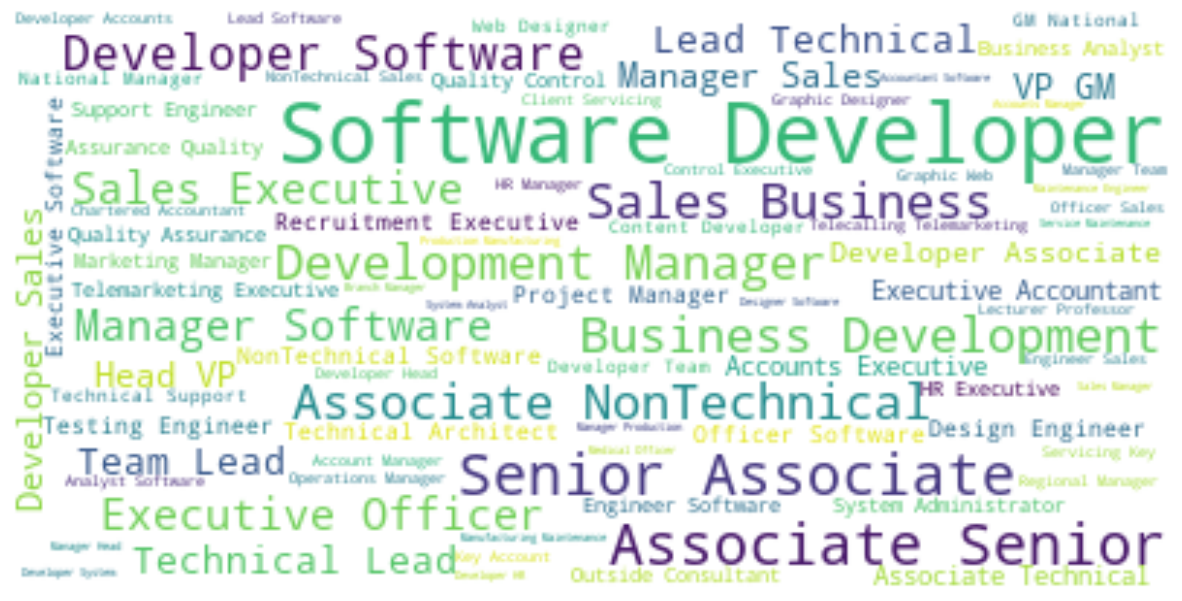

In [10]:
text = " ".join(i for i in data["Job Title"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Core-System Development

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

feature = data["Key Skills"].tolist()
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)

In [18]:
indices = pd.Series(data.index, index=data['Job Title']).to_dict()

### Utility Function

In [29]:
def jobs_recommendation(Title, similarity=similarity):
    if Title not in indices:
        print(f"Error: The title '{Title}' does not exist in the dataset.")
        return None
    
    index = indices[Title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:6]
    newsindices = [i[0] for i in similarity_scores]
    
    recommended_jobs = data[['Job Title', 'Job Experience Required', 'Key Skills']].iloc[newsindices]
    recommended_jobs_dict = recommended_jobs.to_dict(orient="records")
    
    return recommended_jobs_dict

In [30]:
jobs_recommendation("HR Executive")

[{'Job Title': 'Associate/Senior Associate -(NonTechnical)',
  'Job Experience Required': '2 - 7 yrs',
  'Key Skills': ' employee engagement| employee relations| employee welfare| performance appraisal| hrbp| employee retention| employee communication'},
 {'Job Title': 'HR Executive',
  'Job Experience Required': '5 - 7 yrs',
  'Key Skills': ' HR Generalist Activities| talent management| employee relations| payroll administration| employee retention| Employee Engagement| Performance Management| employee welfare'},
 {'Job Title': 'HR Business Partner',
  'Job Experience Required': '3 - 8 yrs',
  'Key Skills': ' Talent Engagement| employee engagement| employee retention| Hrbp'},
 {'Job Title': 'HR Manager',
  'Job Experience Required': '5 - 10 yrs',
  'Key Skills': ' Sales Hiring| employee relations| recruitment management| Human Resource Management| Employee Engagement| hr generalist| Business HR| hr management| HR Operations| Performance Management| Employee Retention'},
 {'Job Title':